In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [2]:
#path untuk sample image
path = ('drive/MyDrive/Jagung All/Bulai_1000/')

In [12]:
image = cv2.imread(path+'Bulai_1 (10).png')
image = cv2.resize(image,(200,300))

In [ ]:
img = image.astype(np.float64)/255.
K = 1 - np.max(img, axis=2)
C = (1-img[...,2] - K)/(1-K) #(1-R-K)/(1-k)
M = (1-img[...,1] - K)/(1-K) # (1-G-K)/(1-k)
Y = (1-img[...,0] - K)/(1-K) #(1-B-K)/(1-k)
CMYK_image= (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)

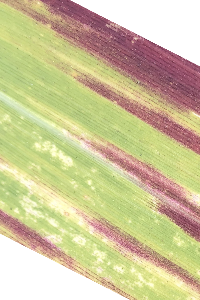

In [9]:
cv2_imshow(image)


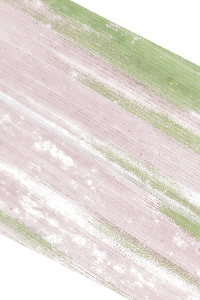

In [10]:
cv2_imshow(CMYK_image)

In [36]:
def rgb(image_file,x,y):
  global B
  global G
  global R
  B,G,R = image_file[x,y]
  return B,G,R

In [35]:
def cmyk(image_file,x,y):
  global C
  global M
  global Y
  global K
  img = image_file.astype(np.float64)/255.
  K = 1 - np.max(img, axis=2)
  C = (1-img[...,2] - K)/(1-K) #(1-R-K)/(1-k)
  M = (1-img[...,1] - K)/(1-K) # (1-G-K)/(1-k)
  Y = (1-img[...,0] - K)/(1-K) #(1-B-K)/(1-k)

  CMYK_image= (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)
  C,M,Y,K = CMYK_image[x,y]
  return C,M,Y,K

In [37]:
#path untuk load 1000 image
images_path = glob.glob('drive/MyDrive/Jagung All/Bulai_1000/*.png')

In [38]:
# Inisiasi Writer Excel
writer = pd.ExcelWriter('Hasil_warna.xlsx')

In [39]:
#1000 image

index = 0
img_ke = 1
tabel_hasil = []
kolom = ["Image","R", "G", "B", "C", "M","Y","K"]
tabel_hasil.append(kolom)
for image in images_path:
  image = cv2.imread(image)
  image = cv2.resize(image,(200,300))
  rgb(image,100,100)
  cmyk(image,100,100)
  tabel_baris = [
      img_ke,
      R,
      G,
      B,
      C,
      M,
      Y,
      K

      
  ]
  index+=1
  img_ke+=1
  tabel_hasil.append(tabel_baris)

tabel_hasil = pd.DataFrame(tabel_hasil)
tabel_hasil.to_excel(writer, sheet_name="RGB-CMYK")
writer.save()